In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py


In [88]:
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [89]:
Year = "2021"
Month = "04"
Day = "23"
BeadNumber = 3
folder = r"/home/data_transfer/data_from_windows/"+ Year + Month + Day

In [115]:
Data_File_Number=32
fname = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Data_File_Number
#fname= "/data/new_trap/20210423/Bead3/Shaking/NoAttractorNoBeadNoShaking0_0.h5"
#fname= "/data/new_trap/20210322/Bead1/InitialTest/Data0.h5"

print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
fsamp=5000
res = 5000


/home/data_transfer/data_from_windows/20210423/Bead3/InitialTest/Data32.h5
No seismometer data
No z_set data
No height data
No electrodes data
No cantilever data
No laser power data


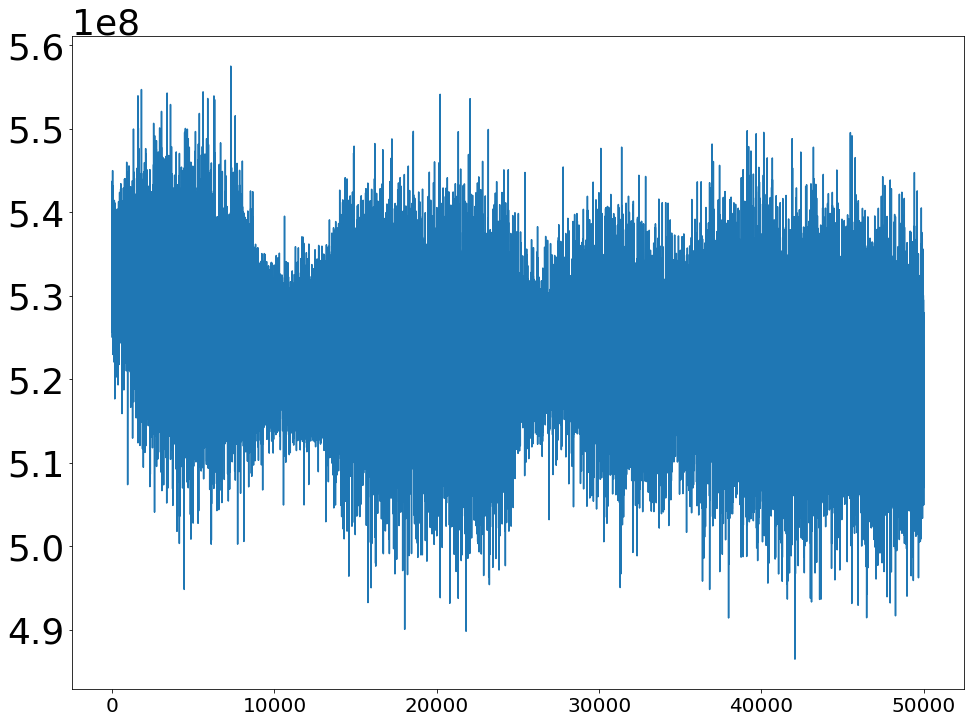

In [116]:
plt.plot(BDF.quad_sum)
plt.show()

In [117]:
data=BDF.xyz
data_det=signal.detrend(data)
y_1000=1*data_det[1]
z_1000=100*data_det[2]

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
ypsd, freqs = matplotlib.mlab.psd(y_1000, Fs = fsamp, NFFT = res)
zpsd, freqs = matplotlib.mlab.psd(z_1000, Fs = fsamp, NFFT = res)

In [118]:
data2=BDF.xyz2
data_det2=signal.detrend(data2)
y_1000=1*data_det2[1]
z_1000=100*data_det2[2]

xpsd2, freqs2 = matplotlib.mlab.psd(data_det2[0], Fs = fsamp, NFFT = res)
ypsd2, freqs2 = matplotlib.mlab.psd(y_1000, Fs = fsamp, NFFT = res)
zpsd2, freqs2 = matplotlib.mlab.psd(z_1000, Fs = fsamp, NFFT = res)

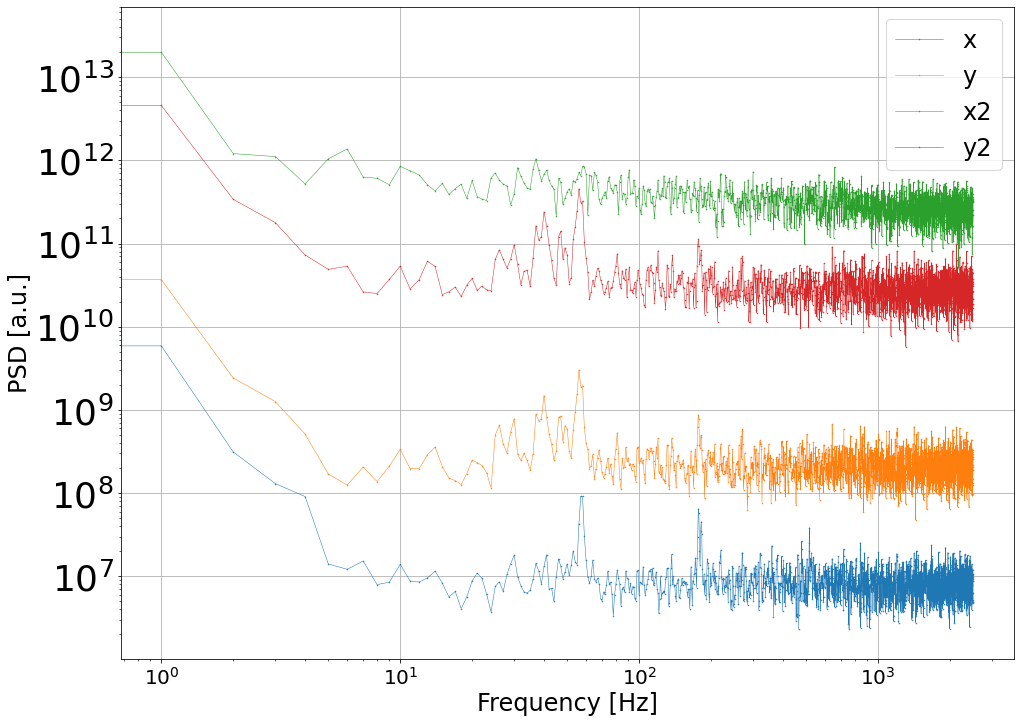

In [119]:
_,ax = plt.subplots()
ax.loglog(freqs, xpsd, '.-', label="x",markersize=1,linewidth=0.5)
ax.loglog(freqs, ypsd, '.-', label="y",markersize=1,linewidth=0.5)
#ax.loglog(freqs, zpsd, '.-', label="z*100",markersize=1,linewidth=0.5)
ax.loglog(freqs2, xpsd2*1e18, '.-', label="x2",markersize=1,linewidth=0.5)
ax.loglog(freqs2, ypsd2*1e18, '.-', label="y2",markersize=1,linewidth=0.5)
#ax.loglog(freqs2, zpsd2, '.-', label="z*100",markersize=1,linewidth=0.5)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
#plt.xlim(1,2500)
#plt.ylim(1e6,1e10)
plt.grid(True)


In [109]:
f = h5py.File(fname,'r')
pos_data = np.array(f['pos_data'])
quad_data = np.array(f['quad_data']) 
fsamp = f.attrs['Fsamp']
fsamp /= f.attrs['downsamp']

In [110]:
amp = quad_data.reshape(-1,12).T[:5]
right = amp[0] + amp[1]
left = amp[2] + amp[3]
top = amp[0] + amp[2]
bottom = amp[1] + amp[3]
quad_sum = right + left
x2 = (right - left)/quad_sum
y2 = (top - bottom)/quad_sum    


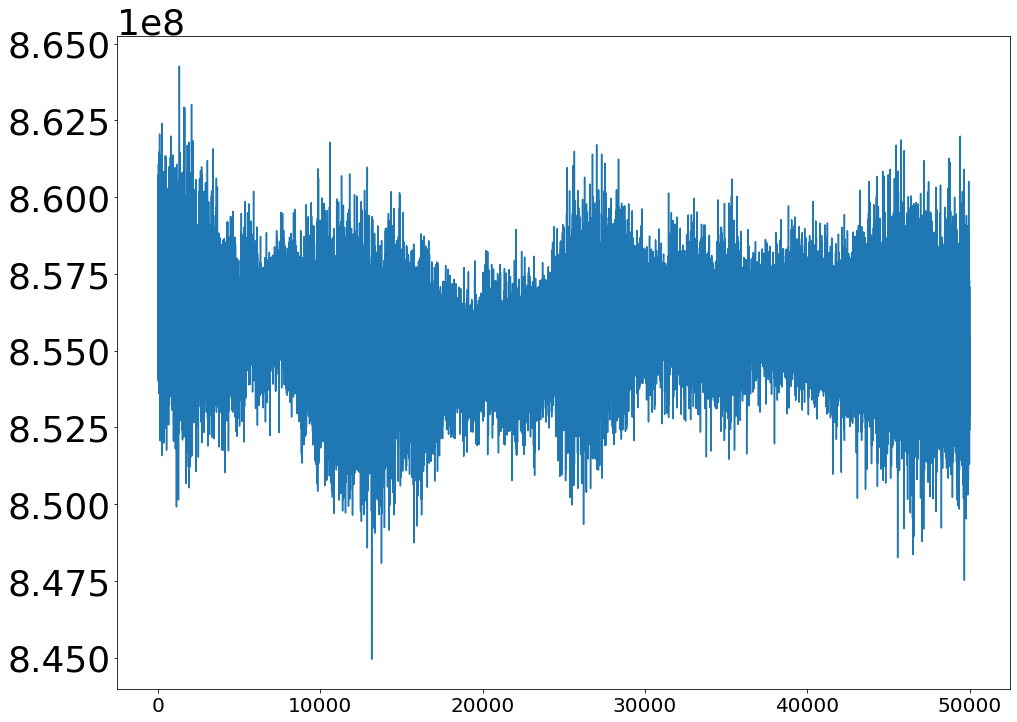

In [114]:
plt.plot(amp[3])
